# Manual Neural Network

In [15]:
class SimpleClass():
    def __init__(self,name):
        print("hello"+name)
    def yell(self):
        print("yelling")

In [16]:
class ExtndedClass(SimpleClass):
    def __init__(self):
        super().__init__("himanshu") 
        print("extended")

In [17]:
x=ExtndedClass()

hellohimanshu
extended


In [18]:
class ExtendedClass(SimpleClass):
    def __init__(self):
        super().__init__(" my string")
        print("extended")

In [19]:
s=ExtendedClass()

hello my string
extended


# Operation

In [206]:
class Operation():
    def __init__(self,input_nodes=[]):
        self.input_nodes=input_nodes
        self.output_nodes=[]
        
        for node in input_nodes:
            node.output_nodes.append(self)
        
        _default_graph.operations.append(self)
        def compute(self):
            pass

# Example Operaton

# Addition

In [207]:
class add(Operation):
    
    def __init__(self,x,y):
        super().__init__([x,y])
    
    def compute(self,x_var,y_var):
        self.inputs=[x_var,y_var]
        return x_var+y_var
        

# Multiplication

In [208]:
class multiply(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
    
    def compute(self,a_var,b_var):
        self.inputs=[a_var,b_var]
        return a_var*b_var
        

# Matrix Multiplicatioin

In [209]:
class matmul(Operation):
    
    def __init__(self,a,b):
        super().__init__([a,b])
    
    def compute(self,a_mat,b_mat):
        self.inputs=[a_mat,b_mat]
        return a_mat.dot(b_mat)

# Placeholder

In [210]:
class Placeholder():
    
    def __init__(self):
        self.output_nodes=[]
        
        _default_graph.placeholders.append(self)

# Variable

In [211]:
class Variable():
    def __init__(self,initial_value=None):
        self.value=initial_value
        self.output_nodes=[]
        _default_graph.variables.append(self)

# Graph

In [212]:
class Graph():
    
    def __init__(self):
        self.operations=[]
        self.placeholders=[]
        self.variables=[]
        
    def set_as_default(self):
        
        global _default_graph
        _default_graph=self

# A basic graph

z=Ax+b
a=10
b=1

In [213]:
g=Graph()

In [214]:
g.set_as_default()

In [215]:
A=Variable(10)

In [216]:
B=Variable(1)

In [217]:
x=Placeholder()

In [218]:

y=multiply(A,x)

In [219]:
z=add(y,B)

# Session

In [220]:
import numpy as np

# Traversing Operation Nodes

In [221]:
def traverse_postorder(operation):
    """ 
    PostOrder Traversal of Nodes. Basically makes sure computations are done in 
    the correct order (Ax first , then Ax + b). Feel free to copy and paste this code.
    It is not super important for understanding the basic fundamentals of deep learning.
    """
    
    nodes_postorder = []
    def recurse(node):
        if isinstance(node, Operation):
            for input_node in node.input_nodes:
                recurse(input_node)
        nodes_postorder.append(node)

    recurse(operation)
    return nodes_postorder

In [222]:
class Session():
    
    def run(self,operation,feed_dict={}):
        
        nodes_postorder=traverse_postorder(operation)
        
        for node in nodes_postorder:
            
            if type(node)==Placeholder:
                node.output=feed_dict[node]
            
            elif type(node)==Variable:
                node.output=node.value
                
            else:
                node.inputs=[input_node.output for input_node in node.input_nodes]
                
                node.output=node.compute(*node.inputs)
            if type(node.output)==list:
                node.output=np.array(node.output)
                
        return operation.output

In [223]:
sess=Session()
result=sess.run(operation=z,feed_dict={x:10})

In [224]:
result

101

Looks like we did it !

In [233]:
g=Graph()
g.set_as_default()
A=Variable([[10,20],[30,40]])
b=Variable([1,3])
x=Placeholder()
y=matmul(A,x)
z=add(y,b)

In [234]:
sess=Session()


In [235]:
result=sess.run(operation=z,feed_dict={x:10})

In [236]:
result

array([[101, 203],
       [301, 403]])

# Classification

# Activation Function

In [237]:
import matplotlib.pyplot as plt
%matplotlib inline

In [300]:
def sigmoid(z_val):
    return 1/(1+np.exp(-z_val))

In [301]:
sample_z=np.linspace(-10,10,100)
sample_a=sigmoid(sample_z)
sample_z

array([-10.        ,  -9.7979798 ,  -9.5959596 ,  -9.39393939,
        -9.19191919,  -8.98989899,  -8.78787879,  -8.58585859,
        -8.38383838,  -8.18181818,  -7.97979798,  -7.77777778,
        -7.57575758,  -7.37373737,  -7.17171717,  -6.96969697,
        -6.76767677,  -6.56565657,  -6.36363636,  -6.16161616,
        -5.95959596,  -5.75757576,  -5.55555556,  -5.35353535,
        -5.15151515,  -4.94949495,  -4.74747475,  -4.54545455,
        -4.34343434,  -4.14141414,  -3.93939394,  -3.73737374,
        -3.53535354,  -3.33333333,  -3.13131313,  -2.92929293,
        -2.72727273,  -2.52525253,  -2.32323232,  -2.12121212,
        -1.91919192,  -1.71717172,  -1.51515152,  -1.31313131,
        -1.11111111,  -0.90909091,  -0.70707071,  -0.50505051,
        -0.3030303 ,  -0.1010101 ,   0.1010101 ,   0.3030303 ,
         0.50505051,   0.70707071,   0.90909091,   1.11111111,
         1.31313131,   1.51515152,   1.71717172,   1.91919192,
         2.12121212,   2.32323232,   2.52525253,   2.72

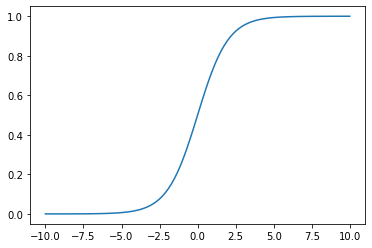

In [302]:
plt.plot(sample_z,sample_a)

In [313]:
class Sigmoid(Operation):
 
    
    def __init__(self, z):

        # a is the input node
        super().__init__([z])

    def compute(self, z_val):
        
        return 1/(1+np.exp(-z_val))

# Classification Example

In [290]:
from sklearn.datasets import make_blobs 

In [262]:
data=make_blobs(n_samples=50,n_features=2,centers=2,random_state=75)

In [263]:
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [264]:
data[0]

array([[  7.3402781 ,   9.36149154],
       [  9.13332743,   8.74906102],
       [  1.99243535,  -8.85885722],
       [  7.38443759,   7.72520389],
       [  7.97613887,   8.80878209],
       [  7.76974352,   9.50899462],
       [  8.3186688 ,  10.1026025 ],
       [  8.79588546,   7.28046702],
       [  9.81270381,   9.46968531],
       [  1.57961049,  -8.17089971],
       [  0.06441546,  -9.04982817],
       [  7.2075117 ,   7.04533624],
       [  9.10704928,   9.0272212 ],
       [  1.82921897,  -9.86956281],
       [  7.85036314,   7.986659  ],
       [  3.04605603,  -7.50486114],
       [  1.85582689,  -6.74473432],
       [  2.88603902,  -8.85261704],
       [ -1.20046211,  -9.55928542],
       [  2.00890845,  -9.78471782],
       [  7.68945113,   9.01706723],
       [  6.42356167,   8.33356412],
       [  8.15467319,   7.87489634],
       [  1.92000795,  -7.50953708],
       [  1.90073973,  -7.24386675],
       [  7.7605855 ,   7.05124418],
       [  6.90561582,   9.23493842],
 

In [265]:
data[1]

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1])

In [268]:
type(data)

tuple

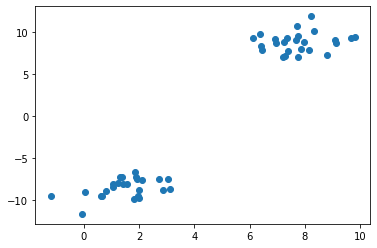

In [270]:
feature=data[0]
plt.scatter(feature[:,0],feature[:,1])

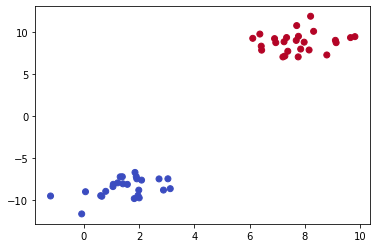

In [271]:
lable=data[1]
plt.scatter(feature[:,0],feature[:,1],c=lable,cmap='coolwarm')

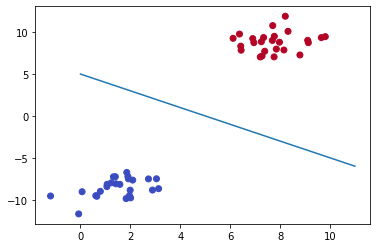

In [273]:
# drew a line that saparate the classes
x=np.linspace(0,11,10)
y=-x+5
plt.scatter(feature[:,0],feature[:,1],c=lable,cmap='coolwarm')
plt.plot(x,y)

## define the Preceptron

y=mx+b

y=−x+5

f1=mf2+b,m=1
 
f1=−f2+5
 
f1+f2−5=0

# Convert to a Matrix Representation of Features

# $$ w^Tx + b = 0 $$

$$   \Big(1, 1\Big)f - 5 = 0 $$

Then if the result is > 0 its label 1, if it is less than 0, it is label=0



# ### Example Point

Let's say we have the point f1=2 , f2=2 otherwise stated as (8,10). Then we have:

$$ 
\begin{pmatrix} 
1 , 1
\end{pmatrix} 
\begin{pmatrix} 
8 \\
10
\end{pmatrix} + 5 =  $$

In [274]:
np.array([1,1]).dot(np.array([[8],[10]]))-5

array([13])

In [275]:
np.array([1,1]).dot(np.array([[4],[-10]]))-5

array([-11])

# Using an example Session Graph

In [314]:
g=Graph()

In [315]:
g.set_as_default()

In [316]:
x=Placeholder()

In [317]:
w=Variable([1,1])

In [318]:
b=Variable(-5)

In [319]:
z=add(matmul(w,x),b)

In [320]:
a=Sigmoid(z)

In [321]:
sess=Session()

In [322]:
sess.run(operation=a,feed_dict={x:[8,10]})

0.999997739675702

In [323]:
sess.run(operation=a,feed_dict={x:[0,-10]})

3.059022269256247e-07

# Manual Neural Network is Done !